## K means clustering algorithm

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [6]:
X.shape

(1000, 2)

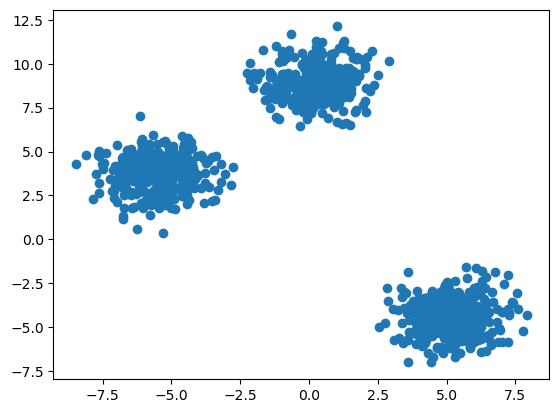

In [10]:
plt.scatter(X[:,0],X[:,1])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
from sklearn.cluster import KMeans

In [14]:
# manual process
# Elbow Method to select the k value

In [15]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [16]:
wcss

[34827.57682552022,
 7935.43728614542,
 1319.2730531585603,
 1140.4677884655127,
 992.5462587554141,
 854.2929980760773,
 756.3838662795163,
 665.2447097840975,
 579.3441535467509,
 537.085741853986]

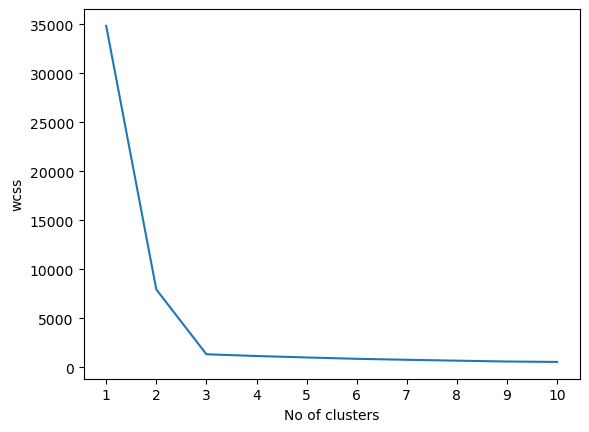

In [17]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No of clusters")
plt.ylabel("wcss")
plt.show()

In [19]:
kmeans=KMeans(n_clusters=k,init="k-means++")
y_pred=kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


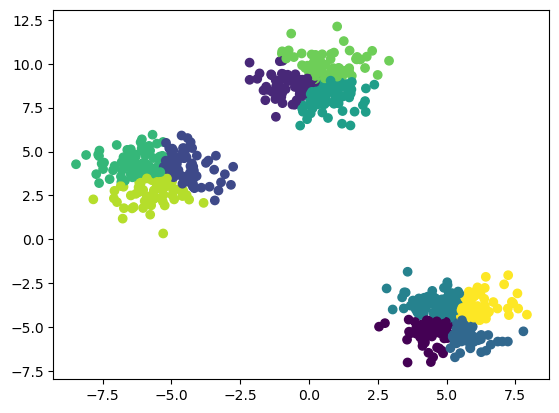

In [22]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_pred)

In [23]:
y_test=kmeans.predict(X_test)

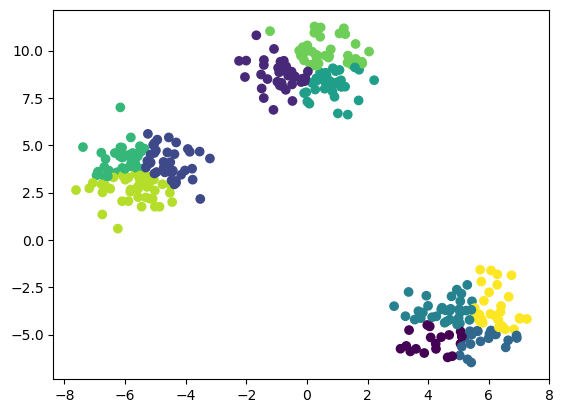

In [26]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

In [27]:
## knee locator

In [28]:
! pip install kneed

In [29]:
from kneed import KneeLocator

In [32]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [34]:
kl.elbow

3

In [35]:
## 3 clusters

## Performance metrics

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score_coeff=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_score_coeff.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [38]:
silhouette_score_coeff

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4814001336222496,
 0.33691828928108875,
 0.3497193753105919,
 0.3479874411609768,
 0.3394135443986313,
 0.34089774494738173]

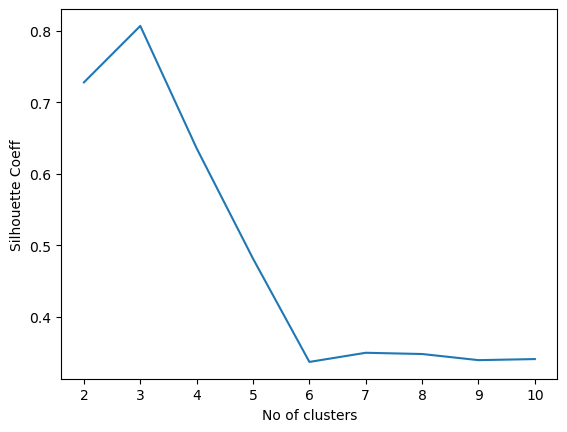

In [40]:
plt.plot(range(2,11),silhouette_score_coeff)
plt.xticks(range(2,11))
plt.xlabel("No of clusters")
plt.ylabel("Silhouette Coeff")
plt.show()